## Worksheet 22: Data manipulation and Visualization in Python
### SDS 348
### 4/26/2021

In [ ]:
# IMPORTANT
# Running this chunk lets you have multiple outputs from a single chunk; run it first!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Working with datasets

Python is an object-oriented programming language. In computer science, the term "object" describes the combination of data and methods that can manipulate the data. Note that to call a function on a given object, we use a period `.` after the name of the object.

We already discussed lists. Let's talk about `Series` and `DataFrame` with `pandas`.

In [ ]:
# Let's create a series based on a list
price_diamonds = pd.Series([350,600,1500])
price_diamonds

0     350
1     600
2    1500
dtype: int64

In [ ]:
# Let's add a label to index this series
price_diamonds = pd.Series(
    [350,600,1500],
    index = ['Argentina', 'Japan', 'New Zealand']
)
price_diamonds

Argentina       350
Japan           600
New Zealand    1500
dtype: int64

In [ ]:
# We can also create a series based on a dictionary
size_diamonds = pd.Series({'Argentina': 3, 'New Zealand' : 5})
size_diamonds

Argentina      3
New Zealand    5
dtype: int64

In [ ]:
# Let's create a data frame based on this series
data = pd.DataFrame({
    "price": price_diamonds,
    "x": size_diamonds
})
data

,price,x
Argentina,350,3.0
Japan,600,NaN
New Zealand,1500,5.0


In [ ]:
# Drop missing data
data.dropna()

,price,x
Argentina,350,3.0
New Zealand,1500,5.0


In [ ]:
# Index with .loc to refer to label index
data.loc['Argentina']

price    350.0
x          3.0
Name: Argentina, dtype: float64

In [ ]:
# Index with .iloc to refer to positional index
data.iloc[1]

price    600.0
x          NaN
Name: Japan, dtype: float64

In [ ]:
# Index specific columns
data['price']

Argentina       350
Japan           600
New Zealand    1500
Name: price, dtype: int64

In [ ]:
# Consider this dataframe:
data2 = pd.DataFrame({
    "price": [320, 400, 750, 925],
    "x": [3.8, 3.5, 4.2, 4],
    "quality": ["Low", "Medium", "High", "High"]},
    index = ["New Zealand", "US", "France", "Spain"])
data2

,price,x,quality
New Zealand,320,3.8,Low
US,400,3.5,Medium
France,750,4.2,High
Spain,925,4.0,High


In [ ]:
# Combine datasets by adding rows
pd.concat([data, data2], sort = False)

,price,x,quality
Argentina,350,3.0,NaN
Japan,600,NaN,NaN
New Zealand,1500,5.0,NaN
New Zealand,320,3.8,Low
US,400,3.5,Medium
France,750,4.2,High
Spain,925,4.0,High


In [ ]:
# Combine datasets with only rows in common, add variables
pd.concat([data, data2], axis = 1, join = "inner")

,price,x,price,x,quality
New Zealand,1500,5.0,320,3.8,Low


Now let's play with a full dataset about diamonds.

In [ ]:
# Open dataset from a package
diamonds = sns.load_dataset('diamonds')

In [ ]:
# How many rows and columns in the dataset?
diamonds.shape

(53940, 10)

In [ ]:
# Take a peek at the dataset
diamonds.head()
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
# Get some information about the variables
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
# Find frequencies of each cut category
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
# Find min/max price of an Ideal cut
diamonds.loc[diamonds['cut'] == "Ideal", 'price'].min()
diamonds.loc[diamonds['cut'] == "Ideal", 'price'].max()

326

18806

#### 2. Reshaping, combining datasets

Let's use some `pandas` functions in Python that are equivalent to `dplyr` functions in R for data wrangling:
![image.png](attachment:image.png)

In [ ]:
# Filter specific type of cut and carat
diamonds.query('cut == "Ideal" & carat <= 0.2')

,carat,cut,color,clarity,depth,table,price,x,y,z
31595,0.2,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
31597,0.2,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
31599,0.2,Ideal,E,VS2,62.2,57.0,367,3.76,3.73,2.33


Instead of pipes in R, we can do a chain of function calls in Python (all in parentheses `()` or using `\` at the end of each function):

In [ ]:
# Select variables (with `filter`), filter only one color (with `query`) and keep the first 3 rows (all in parentheses)
(diamonds.filter(['carat', 'color'])
 .query('color == "E"')
 .head(3))

,carat,color
0,0.23,E
1,0.21,E
2,0.23,E


In [ ]:
# Select variables (with `filter`), filter only one color (with `query`) and calculate statistics (end each function with \)
diamonds.filter(['color', 'price']) \
.query('color == "E"') \
.agg(['mean', 'std'])

,price
mean,3076.752475
std,3344.158685


We can also use some of these pandas functions to create tables and display summary statistics:

In [ ]:
# Summary statistics for Ideal and Premium cut, by color and clarity
(diamonds.filter(['cut', 'carat', 'clarity', 'color'])
.query('cut in ["Ideal","Premium"]')
.groupby(['cut','color','clarity'])
.agg(['mean','std','size'])
.sort_values(by = ('carat','mean'), ascending = False)
.head(5))

carat               
                           mean       std size
cut     color clarity                         
Ideal   J     I1       1.990000  1.442498    2
Premium I     I1       1.605833  0.873543   24
        J     I1       1.578462  0.919020   13
              SI2      1.554534  0.567969  161
Ideal   H     I1       1.475526  0.527993   38

Let's use some `pandas` functions in Python that are equivalent to `tidyr` functions in R for data wrangling:
![image.png](attachment:image.png)

In [ ]:
# Only select some variables to transpose in the dataset
diamonds.filter(['x','y','z']).head()

# Size of the dataset
len(diamonds.filter(['x','y','z']))

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75


53940

In [ ]:
# Make the data longer
diamonds.melt(value_vars=['x','y','z']).head()

# Size of the dataset
len(diamonds.melt(value_vars=['x','y','z']))

,variable,value
0,x,3.95
1,x,3.89
2,x,4.05
3,x,4.20
4,x,4.34


161820

In [ ]:
# Double check the size
3*53940

161820

#### 3. Creating visualizations

We will use both the package `matplotlib.pyplot` and `seaborn` to make visualizations:

Text(0.5, 0, 'price')

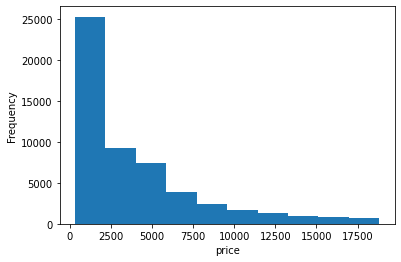

In [ ]:
# Create a histogram
diamonds['price'].plot(kind = "hist")
plt.xlabel('price') # add a label

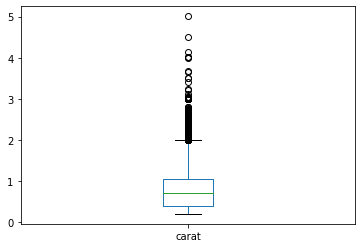

In [ ]:
# Create a boxplot
diamonds['carat'].plot(kind = "box")

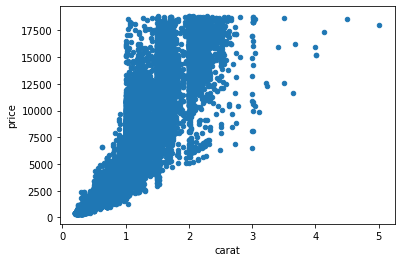

In [ ]:
# Use pandas to create a scatterplot
diamonds.plot.scatter(x = 'carat', y = 'price')

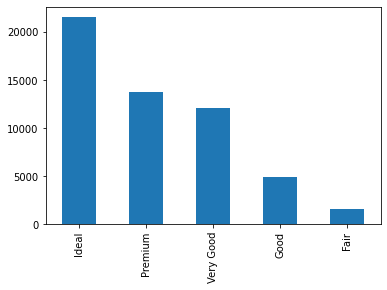

In [ ]:
# Create a barplot by displaying counts
diamonds['cut'].value_counts().plot(kind = "bar")

(-1.1164755246121678,
 1.1007845501285745,
 -1.1087852114205277,
 1.1171101827045422)

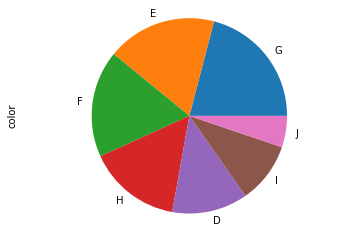

In [ ]:
# Create a pie chart to display proportions
diamonds['color'].value_counts() \
.plot(kind = "pie") \
.axis('equal') # equal aspect ratio

We can also manipulate our data before plotting:

In [ ]:
# Create a dataset:
            # - with a new variable for price, categorical, split into 3 levels (low, medium, high) 
dataplot = (diamonds.assign(pricecat = pd.cut(diamonds['price'], bins = 3, labels = ['low', 'med', 'high']))
            # - keep only variables x, z and the price category
            .filter(['x', 'z', 'pricecat'])
            # - rename the variables x as width, z as depth
            .rename(columns={'x': 'width', 'z': 'depth'})
            # - save width and depth in a variable called mm and identify type of value with the variable dim
            .melt(id_vars = ['pricecat'], value_vars = ['width','depth'], var_name = 'dim', value_name = 'mm')
            # - only keep values of width and length between 2 and 10 mm
            .query('2 < mm < 10'))
       
dataplot.head()

,pricecat,dim,mm
0,low,width,3.95
1,low,width,3.89
2,low,width,4.05
3,low,width,4.20
4,low,width,4.34


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

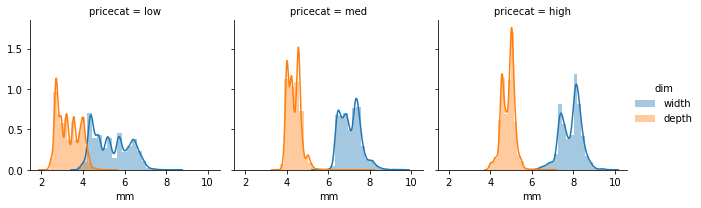

In [ ]:
# Create a plot:
(sns.FacetGrid(data = dataplot, 
               col = 'pricecat', # grid column represents price category 
               hue = 'dim') # color data by dim (width or depth) 
 .map(sns.distplot, # type of plot
      'mm', # represents the values of the variable mm
      hist = True, # in a histogram
      bins = 20) # the histograms have a binwidth of 20
 .add_legend()) # add a legend

# Display plot
plt.show()

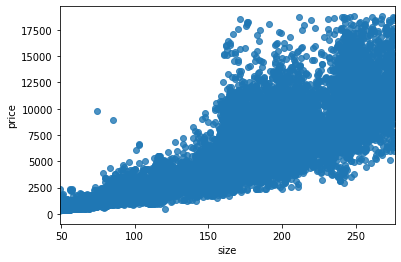

In [ ]:
# Create a plot after data manipulation with .pipe()
diamonds.assign(size = diamonds['x'] * diamonds['y'] * diamonds['z']) \
.query('carat>carat.median()' and 'size.quantile(.05)<size<size.quantile(.95)') \
.pipe((sns.regplot, 'data'), # type of plot
      x = 'size', # x-axis
      y = 'price')

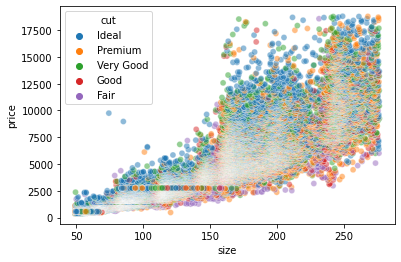

In [ ]:
# As the packages always improve, there is now a sns.scatterplot but it doesn't work on the server
diamonds.assign(size = diamonds['x'] * diamonds['y'] * diamonds['z']) \
.query('carat > carat.median()' and 'size.quantile(.05) < size < size.quantile(.95)') \
.pipe((sns.scatterplot, 'data'), \
      x = 'size', y = 'price', hue = 'cut', alpha = .5)

Just like with `ggplot2`, there are many different types of graphs and options. Here is an overview: https://seaborn.pydata.org/examples/index.html